# IS 4487 Lab 14

## Outline

1. Import customer reviews
2. Create prompts for LLM (ChatGPT)
3. Summarize Customer Reviews

*Important note:*
You will use the API key from the Canvas assignment for your work, but you must NOT save it in your public GitHub repository.  It will quickly be found and used, draining my budget!

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab14_megatelco_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Install and Load Libraries

In [1]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.5 MB/s eta 0:00:00


In [2]:
pip install itables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.9 MB/s eta 0:00:00


In [3]:
import os
from openai import OpenAI
import pandas as pd
from itables import show

##Set the API Key Temporarily
Remember to remove it before saving to GitHub

In [9]:

client=OpenAI(
    api_key = "sk-proj-nYDzV4rwnHrPgyxQkLjUT3BlbkFJz2CLSvDDhpntTv1yhDSo"
)

##Get Reviews

In [5]:
reviews_data = {
    'Date': ['2023-12-01', '2023-12-03', '2023-12-05', '2023-12-08', '2023-12-10', '2023-12-12', '2023-12-15', '2023-12-18', '2023-12-20', '2023-12-22'],
    'Stars': [4, 3, 5, 4, 2, 5, 3, 4, 1, 5],
    'Review': [
        "I purchased a Megatelco phone last week, and I'm impressed with its sleek design and powerful performance. The camera quality is exceptional, and the battery life is commendable. Overall, a solid 4-star experience.",
        "My Megatelco phone arrived promptly, but I've noticed some issues with the software. It tends to lag at times, affecting the user experience. Customer support was helpful, but I expected better performance. 3 stars.",
        "Megatelco offers top-notch phones! I'm thrilled with the features and the smooth interface. The camera takes stunning photos, and the battery lasts all day. 5 stars without a doubt!",
        "I've been using Megatelco phones for a while now, and they never disappoint. The latest model I purchased is no exception. Great performance, stylish design, and excellent customer service. 4 stars from a satisfied customer.",
        "Regrettably, my experience with Megatelco was not as expected. The phone had constant connectivity issues, and the support team couldn't provide a solution. Disappointed and only giving it 2 stars.",
        "Megatelco's latest phone exceeded my expectations! It's packed with innovative features, and the customer service team was quick to address a minor concern I had. Solid 5-star rating!",
        "I had a mixed experience with Megatelco. The phone's performance is decent, but I encountered some software glitches. Customer support was responsive but couldn't entirely resolve the issue. 3 stars.",
        "Megatelco phones are reliable and offer great value. The user-friendly interface, coupled with impressive features, makes them a top choice. I'm giving it 4 stars for its overall quality.",
        "My Megatelco phone started malfunctioning within a week of purchase. The touch screen became unresponsive, and customer support was unable to provide a quick solution. Unfortunately, a 1-star rating.",
        "I recently upgraded to the latest Megatelco phone, and it's fantastic! The speed, camera quality, and battery life are exceptional. The sleek design is a bonus. Easy 5 stars!"
    ]
}

# Creating the DataFrame
df = pd.DataFrame(reviews_data)
show(df)
print(df['Review'].iloc[:1])

0    I purchased a Megatelco phone last week, and I...
Name: Review, dtype: object


##Create Prompts and Send to Model

In [6]:
review = df['Review'].values[0]
print(review)
messages = [{"role":"system","content":"Summarize the sentiment and most important points in the following user review for a phone company named Megatelco.  Format the output in a table."}]
messages.append({"role":"user", "content":review})
print(messages)

I purchased a Megatelco phone last week, and I'm impressed with its sleek design and powerful performance. The camera quality is exceptional, and the battery life is commendable. Overall, a solid 4-star experience.
[{'role': 'system', 'content': 'Summarize the sentiment and most important points in the following user review for a phone company named Megatelco.  Format the output in a table.'}, {'role': 'user', 'content': "I purchased a Megatelco phone last week, and I'm impressed with its sleek design and powerful performance. The camera quality is exceptional, and the battery life is commendable. Overall, a solid 4-star experience."}]


In [10]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages = messages,
    max_tokens = 250
)

## Display Response

In [11]:
print(response.choices[0].message.content)

| Sentiment   | Positive   |
|-------------|------------|
| Design      | Sleek      |
| Performance | Powerful   |
| Camera      | Exceptional|
| Battery life| Commendable|
| Rating      | 4 stars    |


## Create a Loop to Submit Reviews

➡️ Assignment Tasks
- Create a FOR loop to iterate through reviews
- Collect the responses in a single datafram

In [13]:
response_data = []

# Iterate through reviews
for review in reviews_data['Review']:
    # Send request to OpenAI API
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "Summarize the sentiment and most important points in the following user review for a phone company named Megatelco.  Format the output in a table."},
                  {"role": "user", "content": review}],
        max_tokens=250
    )
    # Store response
    response_data.append(response.choices[0].message.content)

# Create a dataframe to store the responses
df_responses = pd.DataFrame({
    'Review': reviews_data['Review'],
    'Summary': response_data
})

# Display the dataframe
print(df_responses)

                                              Review  \
0  I purchased a Megatelco phone last week, and I...   
1  My Megatelco phone arrived promptly, but I've ...   
2  Megatelco offers top-notch phones! I'm thrille...   
3  I've been using Megatelco phones for a while n...   
4  Regrettably, my experience with Megatelco was ...   
5  Megatelco's latest phone exceeded my expectati...   
6  I had a mixed experience with Megatelco. The p...   
7  Megatelco phones are reliable and offer great ...   
8  My Megatelco phone started malfunctioning with...   
9  I recently upgraded to the latest Megatelco ph...   

                                             Summary  
0  | Sentiment   | Positive  |\n|-------------|--...  
1  | Sentiment   | Points                        ...  
2  | Sentiment | Positive |\n|-----------|-------...  
3  | Sentiment   | Positive     |\n|-------------...  
4  | Sentiment   | Points                        ...  
5  | Sentiment   | Positive    |\n|-------------|... 

## Summarize the Responses

➡️ Assignment Tasks
- Create at least two visualizations to show the most important themes and sentinment of the reviews

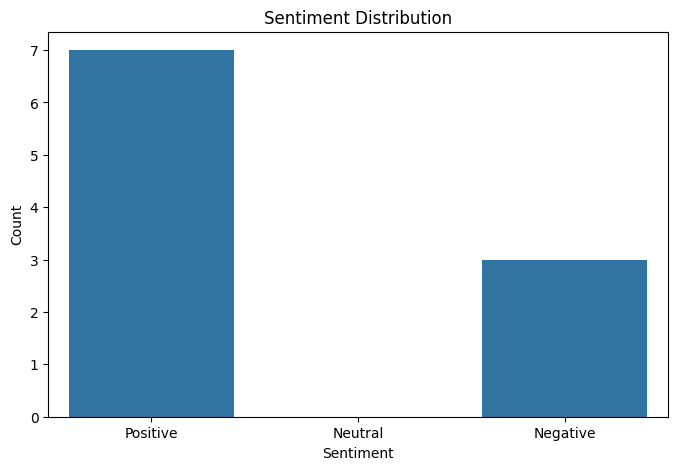

In [14]:
#sentiment frequency
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Perform sentiment analysis
df_responses['Sentiment'] = df_responses['Summary'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define a function to categorize sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Categorize sentiment
df_responses['Sentiment_Category'] = df_responses['Sentiment'].apply(categorize_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment_Category', data=df_responses, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [18]:
#themes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_responses['Summary'])

# Topic modeling with LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Function to display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

# Display the top words for each topic
print("Top words for each topic:")
no_top_words = 5
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)



Top words for each topic:
Topic 1:
points sentiment customer stars megatelco

Topic 2:
life sleek exceptional battery camera

Topic 3:
negative helpful support software user

Topic 4:
negative rating phone sentiment points

Topic 5:
features battery camera interface key

